<a href="https://colab.research.google.com/github/workingbetter/ITNPAI1/blob/main/ITNPAI1_3071806.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

#University of Stirling - Spring 2023

## ITNPAI1 - Deep Learning for Vision and NLP (2022/3)

---

# ITNPAI1 Project
MICHAEL BOGALE
3071806

---
# 1. Problem Defination
## Image Classification problem
Creating a deep learning model that classifies cars and trees on image dataset collected from Areal imaging on Google Earth Pro and testing its performance.
## Dataset collected 
Addis Ababa 

Stirling

---
# 2. Github repository
repository created

###Invitation sent usernames

1. sandyCarmichael
2. vak000
3. jeferssonalex

---
# 3. Dataset Creation
##Created dataset containing 400 images on each subset
## Addis Ababa Labeled Images
####Addis Ababa Car (400)
####Addis Ababa Tree (400)
####Addis Ababa Neither (400)
## Stirling Labeled Images
####Stirling Car (400)
####Stirling Tree (400)
####Stirling Neither (400)

The images are extracted from Google Earth Pro

The images are collected from Addis Ababa and Stirling. 

*Images taken at eye altitude of 200 meter from the surface of the earth on march 2023.*



---
# 4. Dataloader
1. Pre processing
2. Cleaning
3. De-noising

Importing necessary modules

In [25]:
# Importing necessary libraries and modules

import os
from PIL import Image
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Pre processing


labeling Dataframe function created

extracting to csv line utilized

label csv is created for easier access

In [24]:

"""the dataset is locate on my drive therefore it can not be accessed directly from github
may be i will find a way to access the zip file in github later """

# Directory path Image dataset
stir_path = "/content/drive/MyDrive/Deep learning/dataset/Stirling Labeled/"
addis_path = "/content/drive/MyDrive/Deep learning/dataset/Addis Ababa Labeled/"

# Defining a function for generating dataframe of lables 
def labeler_csv(path):
  data = []
  for folder in os.listdir(path):
      for file in os.listdir(os.path.join(path, folder)):
        if file != '.DS_Store':
          data.append([os.path.join(folder, file), folder])
  df = pd.DataFrame(data, columns=['filename', 'label'])
  # df.to_csv('/content/drive/MyDrive/Stirling_labels.csv', index=False)
  return(df)

display(labeler_csv(stir_path))

,filename,label
0,car/image1_1x13.jpg,car
1,car/image1_3x10.jpg,car
2,car/image1_3x11.jpg,car
3,car/image1_7x1.jpg,car
4,car/image1_7x29.jpg,car
...,...,...
1195,tree/image9_8x30.jpg,tree
1196,tree/image10_1x13.jpg,tree
1197,tree/image10_1x11.jpg,tree
1198,tree/image10_1x14.jpg,tree


### Data cleaning and preprocessing before starting building the model is necessary to ensure it is in a suitable format for training.

Resizing the images to have uniform dimension is necessary.

Converting the images to pytorch tensor format.

Normalizing pixel values to lie between 0 and 1 using the transforms.Normalize() function in PyTorch.

### Data Denoising and Augmentation
Adding denoising, data augmentation.

In [ ]:
from torchvision.transforms import RandomHorizontalFlip, RandomRotation, GaussianBlur
# Define the transformations to be applied to the images
# Transforms is a function imported from torchvision
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),  # data augmentation
    transforms.RandomRotation(degrees=15),  # data augmentation
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),  # denoising
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # normalize the images
])


In [26]:

# Define the transformations to be applied to the images
transform = transforms.Compose([
    transforms.Resize((224, 224)), # resize the images to 224x224
    transforms.ToTensor(), # convert the images to PyTorch tensors
    # transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # normalize the images
])

# Define the dataset class
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.image_paths = []
        self.labels = []
        
        # Load the image paths and labels from the two folders
        for label in ['0', '1']:
            folder_path = f'{root_dir}/{label}/'
            for image_path in os.listdir(folder_path):
                self.image_paths.append(f'{folder_path}/{image_path}')
                self.labels.append(int(label))
        
    def __len__(self):
        return len(self.image_paths)
    
    def __getitem__(self, idx):
        # Load the image and apply the transformations
        image_path = self.image_paths[idx]
        image = Image.open(image_path)
        image = transform(image)
        
        # Get the label of the image
        label = self.labels[idx]
        
        return image, label



In [27]:
# Define plotting function
def plot_dataset(positive, negative):
    labels_map = {
        0: negative,
        1: positive
    }

    # Selecting some images for preview
    figure = plt.figure(figsize=(8, 4))
    cols, rows = 5, 3
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(dataset), size=(1,)).item() # Randomly selected
        #print(sample_idx)
        img, label = dataset[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(labels_map[label])
        plt.axis("off")
        new_img = np.transpose(img, (1, 2, 0))
        plt.imshow(new_img.squeeze())
    plt.show()

Creating a dataloader object by passing the dataset object and other parameters to DataLoader.

Iterating over the dataloader object in the training or testing loop to get batches of data and labels

https://pytorch.org/tutorials/beginner/basics/data_tutorial.html


### Stirling Tree

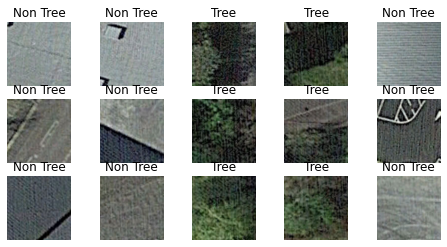

In [28]:
# Create the dataset and dataloader objects
dataset_loc = '/content/drive/MyDrive/Deep learning/dataset11/dataset/Stirling_Tree'

dataset = CustomDataset(dataset_loc)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

plot_dataset("Tree", "Non Tree")

### Stirling Car

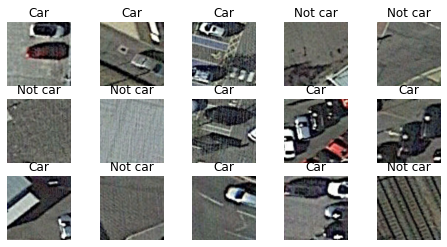

In [29]:
# Create the dataset and dataloader objects
dataset_loc = '/content/drive/MyDrive/Deep learning/dataset11/dataset/Stirling_Car'

dataset = CustomDataset(dataset_loc)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

plot_dataset("Car", "Not car")

### Addis Ababa Tree

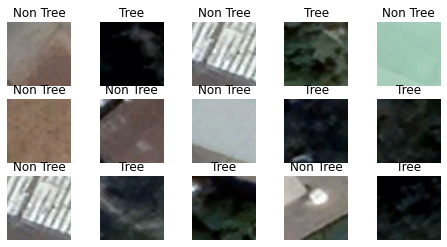

In [30]:
# Create the dataset and dataloader objects
dataset_loc = '/content/drive/MyDrive/Deep learning/dataset11/dataset/Addis_Ababa_Tree'

dataset = CustomDataset(dataset_loc)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

plot_dataset("Tree", "Non Tree")

### Addis Ababa Car

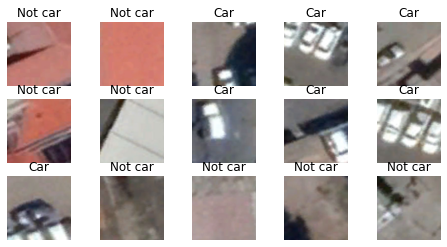

In [31]:
# Create the dataset and dataloader objects
dataset_loc = '/content/drive/MyDrive/Deep learning/dataset11/dataset/Addis_Ababa_Car'

dataset = CustomDataset(dataset_loc)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

plot_dataset("Car", "Not car")

Splitting the dataset into train and test sets

In [34]:
from torch.utils.data import random_split

train_ratio = 0.8
total_size = len(dataset)
train_size = int(train_ratio * total_size)
test_size = total_size - train_size

train_set, test_set = random_split(dataset, [train_size, test_size])


Creating train and test dataloader

# Addis Ababa Car

In [ ]:
# Create the dataset and dataloader objects
dataset_loc = '/content/drive/MyDrive/Deep learning/dataset11/dataset/Addis_Ababa_Car'

dataset = CustomDataset(dataset_loc)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


In [35]:

train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_set, batch_size=64, shuffle=False)


creating a model

In [36]:
import torchvision.models as models


In [37]:
num_classes = 2  # Change this value according to the number of classes in your dataset

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Defining model loss function and optimizer

In [38]:
import torch.nn as nn
import torch.optim as optim

model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


training our model on training dataset

In [39]:
num_epochs = 10
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model.to(device)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_dataloader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    train_acc = 100 * correct / total
    epoch_loss = running_loss / len(train_dataloader)

    print(f'Epoch: {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {train_acc:.2f}%')


Epoch: 1/10, Loss: 0.3573, Accuracy: 85.62%
Epoch: 2/10, Loss: 0.1477, Accuracy: 94.38%
Epoch: 3/10, Loss: 0.0951, Accuracy: 96.56%
Epoch: 4/10, Loss: 0.0655, Accuracy: 97.97%
Epoch: 5/10, Loss: 0.0681, Accuracy: 97.34%
Epoch: 6/10, Loss: 0.0713, Accuracy: 97.66%
Epoch: 7/10, Loss: 0.1024, Accuracy: 96.88%
Epoch: 8/10, Loss: 0.0822, Accuracy: 97.19%
Epoch: 9/10, Loss: 0.0916, Accuracy: 96.88%
Epoch: 10/10, Loss: 0.0515, Accuracy: 98.12%


Evaluating the model on test dataset

In [40]:
model.eval()
correct = 0
total = 0
test_loss = 0.0

with torch.no_grad():
    for images, labels in test_dataloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)

        test_loss += loss.item()

        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

test_acc = 100 * correct / total
test_loss = test_loss / len(test_dataloader)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}%')


Test Loss: 0.2069, Test Accuracy: 91.88%


# 5. Proposed Solution